<a href="https://colab.research.google.com/github/mm79Code/Recommendation-AlGOs/blob/main/SourceCodes/RecommendationEngine_HypothesisBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# We are trying to build a music recommendation system. We will use three different Methods
1. Hypothesis-based algorithm and recommendation model based on the hypothesis
2. Model based recommendation engine
3. LLM based approach

## Current code demonstrated below covers the solution 1.

## We will follow the following methodology
* Data Preprocessing & EDA
* Establish Hypothesis
* Build Algorithm
* Test

## Data Preprocessnig and EDA

In [1]:
#Load libraries , mount drive and load data

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

song_df_1 = pd.read_csv('/content/drive/MyDrive/ColabCodeRepo/MusicRecommendations/DataFiles/song_data.csv')
count_df_1 = pd.read_csv('/content/drive/MyDrive/ColabCodeRepo/MusicRecommendations/DataFiles/count_data.csv')


Mounted at /content/drive


In [2]:
song_df_1.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [5]:
count_df_1.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [3]:
# Merge the two DataFrames
combined_df = pd.merge(count_df_1, song_df_1, on='song_id', how='inner')

# Remove duplicate columns (if any)
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

# Display the combined DataFrame
combined_df.head()


,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,18887,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,21627,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,27714,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,34428,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


In [77]:
# check for null values in data
combined_df.isnull().sum()

,0
Unnamed: 0,0
user_id,0
song_id,0
play_count,0
title,0
release,0
artist_name,0
year,0


<b> No Null Values to be taken care of



<b> EDA: Find Outliers where songs were played an exorbitantly higher number of times, which skews the data.

In [4]:
# prompt: build a dataframe with user_id,song id ,count of unique users , sum of playcount and playcount

import pandas as pd
# Group by 'user_id' and 'song_id' and aggregate
user_song_df = combined_df.groupby(['user_id', 'song_id'])['play_count'].agg(['sum']).reset_index()

# Rename columns for clarity
user_song_df.columns = ['user_id', 'song_id', 'sum_playcount']


In [5]:
# Display the resulting DataFrame
print("Head")
user_song_df.sort_values(by='sum_playcount', ascending=False)


Head


,user_id,song_id,sum_playcount
1633843,d13609d62db6df876d3cc388225478618bb7b912,SOFCGSE12AF72A674F,2213
1186229,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,SOJRFWQ12AB0183582,1992
629432,50996bbabb6f7857bf0c8019435b5246a0e45cfd,SOUAGPQ12A8AE47B3A,920
740298,5ea608df0357ec4fda191cb9316fe8e6e65e3777,SOKOSPK12A8C13C088,879
1470996,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,SOZQSVB12A8C13C271,796
...,...,...,...
863978,6e55124bcae233ae6f0f85956859fae4bb622c80,SOMIODX12A6701C5E6,1
863975,6e55124bcae233ae6f0f85956859fae4bb622c80,SOENHPH12A6310E228,1
863970,6e53e114863319cce51cd83457e2ce1577ae4440,SOXLOQG12AF72A2D55,1
863965,6e53e114863319cce51cd83457e2ce1577ae4440,SOWKBNB12A582A2325,1


Top 10 rows of the initial DataFrame:
              song_id  sum_playcount
0  SOAAAGQ12A8C1420C8            227
1  SOAACPJ12A81C21360            352
2  SOAACSG12AB018DC80            158
3  SOAAEJI12AB0188AB5            131
4  SOAAFAC12A67ADF7EB            405
5  SOAAFYH12A8C13717A            729
6  SOAAJMQ12A6D4F7D17            169
7  SOAAKPM12A58A77210            464
8  SOAALWN12A6D4F7FDA            215
9  SOAAMOW12AB018149B            131

Filtered DataFrame - Iteration 0:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[9054 rows x 2 columns]


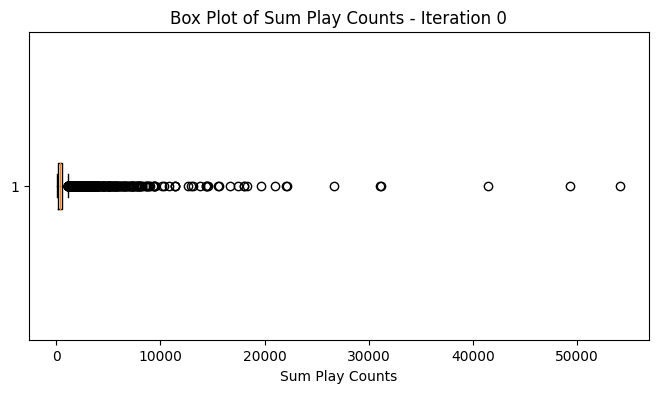


Filtered DataFrame - Iteration 1:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8622 rows x 2 columns]


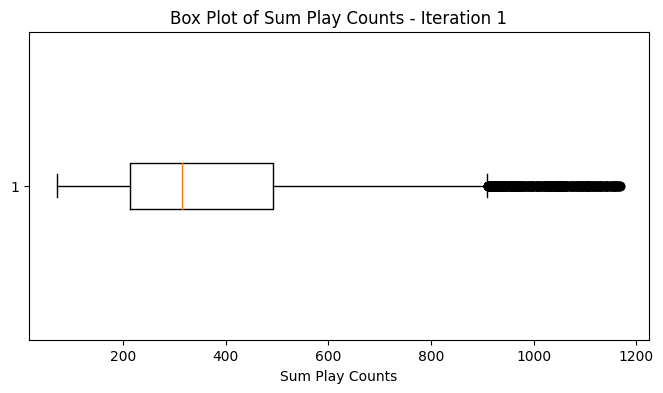


Filtered DataFrame - Iteration 2:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8434 rows x 2 columns]


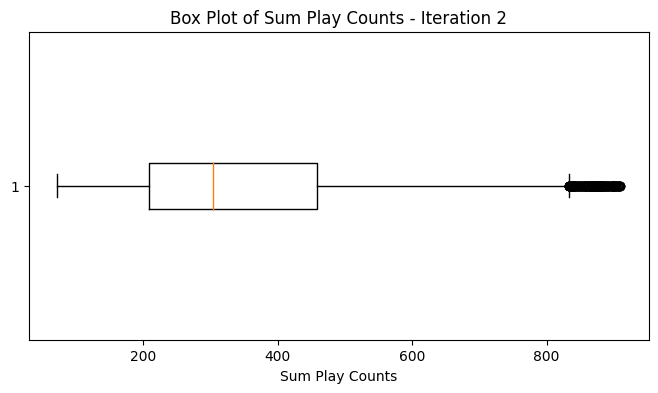


Filtered DataFrame - Iteration 3:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8327 rows x 2 columns]


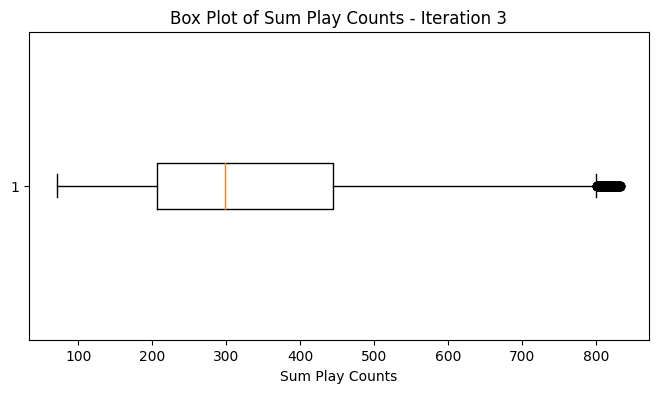


Filtered DataFrame - Iteration 4:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8270 rows x 2 columns]


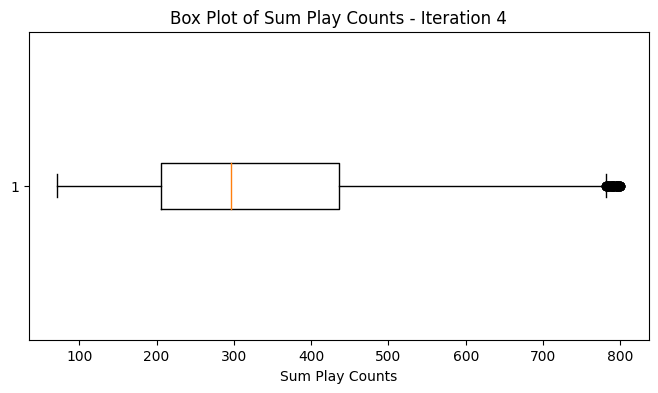


Filtered DataFrame - Iteration 5:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8233 rows x 2 columns]


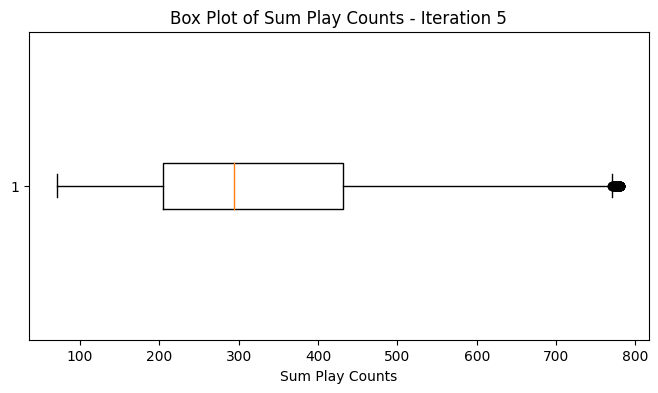


Filtered DataFrame - Iteration 6:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8220 rows x 2 columns]


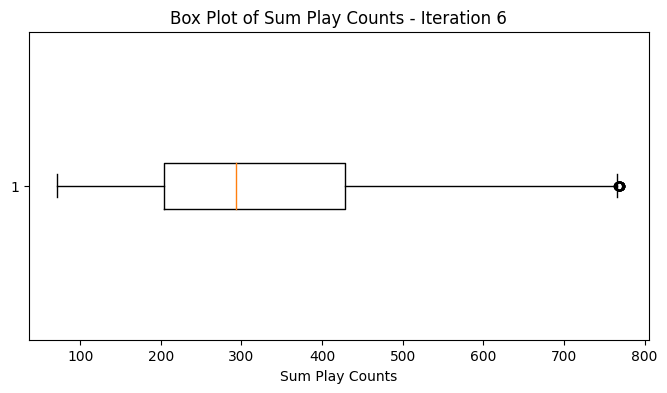


Filtered DataFrame - Iteration 7:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8212 rows x 2 columns]


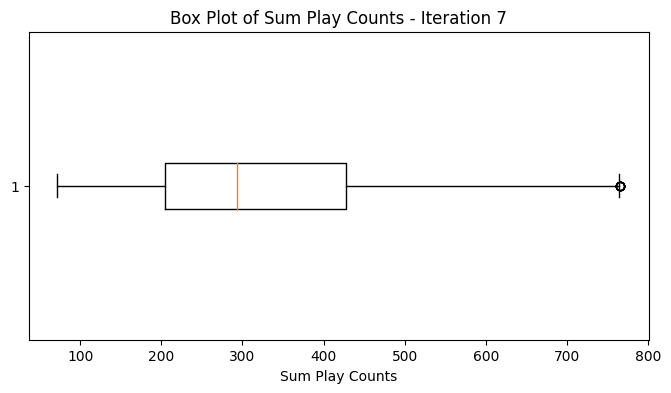


Filtered DataFrame - Iteration 8:
                 song_id  sum_playcount
0     SOAAAGQ12A8C1420C8            227
1     SOAACPJ12A81C21360            352
2     SOAACSG12AB018DC80            158
3     SOAAEJI12AB0188AB5            131
4     SOAAFAC12A67ADF7EB            405
...                  ...            ...
9995  SOZZTNF12A8C139916            611
9996  SOZZVWB12AB0189C30            253
9997  SOZZWZV12A67AE140F            325
9998  SOZZYAO12A6701FF36            116
9999  SOZZZPV12A8C1444B5            153

[8212 rows x 2 columns]


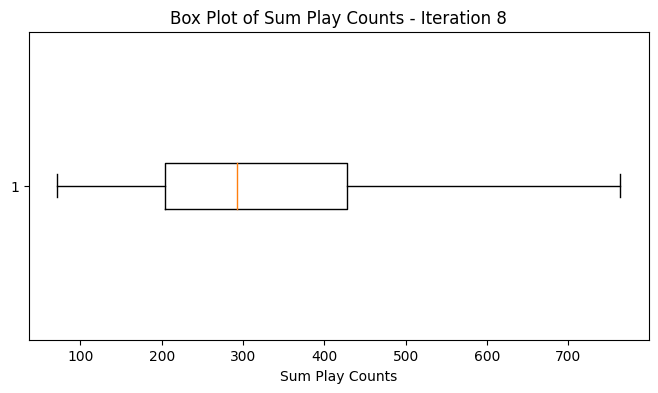

In [8]:
data = user_song_df
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate the sum of play counts for each song
song_play_df = data[['song_id', 'sum_playcount']].groupby('song_id').sum().reset_index()

# Step 2: Display the head of the dataframe (top 10 records)
print("Top 10 rows of the initial DataFrame:")
print(song_play_df.head(10))

# Step 3: Plot box plots and exclude outliers iteratively
iteration = 0
while True:
    # Create a figure for the current iteration
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    # Show the box plot of the current sum play counts
    ax.boxplot(song_play_df['sum_playcount'], vert=False)
    ax.set_title(f'Box Plot of Sum Play Counts - Iteration {iteration}')
    ax.set_xlabel('Sum Play Counts')

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = song_play_df['sum_playcount'].quantile(0.25)
    q3 = song_play_df['sum_playcount'].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    iqr = q3 - q1

    # Determine the filtering bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to exclude extreme values
    filtered_df = song_play_df[(song_play_df['sum_playcount'] >= lower_bound) &
                               (song_play_df['sum_playcount'] <= upper_bound)]

    # Display the filtered DataFrame for the current iteration
    print(f"\nFiltered DataFrame - Iteration {iteration}:")
    print(filtered_df)

    # Show the plot for the current iteration
    plt.show()

    # If the filtered dataframe is the same as the original, stop the iteration
    if filtered_df.shape[0] == song_play_df.shape[0]:
        break

    # Update the dataframe for the next iteration
    song_play_df = filtered_df

    # Move to the next iteration
    iteration += 1

## Based on above EDA, most popular songs are probably played between 300 to 750 times

Head of the sorted dataframe:
                 song_id  unique_user_count
2220  SOFRQTD12A81C233C0               8277
317   SOAUWYT12A81C206F1               7032
352   SOAXGDH12A8C13F8A1               6949
614   SOBONKR12A58A7A7E0               6412
7416  SOSXLTC12AF72A7F54               6145

Filtered DataFrame - Iteration 0
                 song_id  unique_user_count
6289  SOPXFGP12A8C13FA9F                369
3721  SOJJBVA12A58A78A79                369
9360  SOYELXR12A8C14153A                369
7093  SOSBNIU12AB017CFEB                369
3457  SOIRUXQ12A8C133060                369
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[9129 rows x 2 columns]


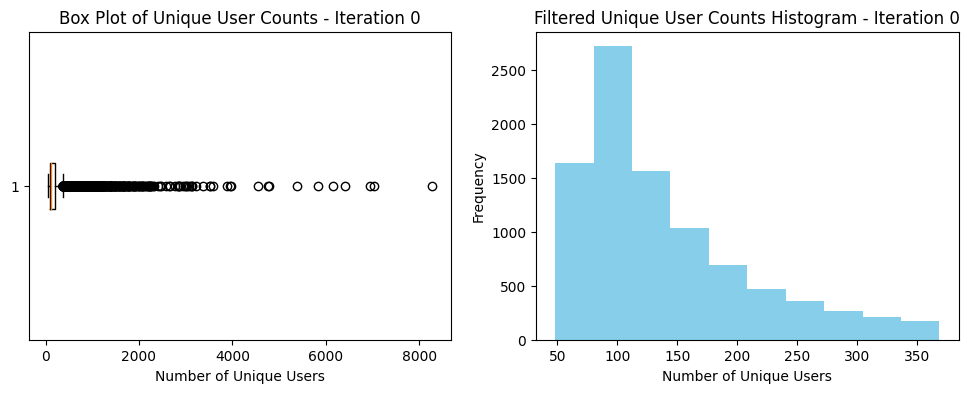


Filtered DataFrame - Iteration 1
                 song_id  unique_user_count
2038  SOFFQBG12A6D4F9793                302
7026  SORWJSF12A8C138AB6                302
2502  SOGIEOU12A8C134815                302
8749  SOWNRRW12A58A801BA                302
7050  SORYCIK12AB018535E                301
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8731 rows x 2 columns]


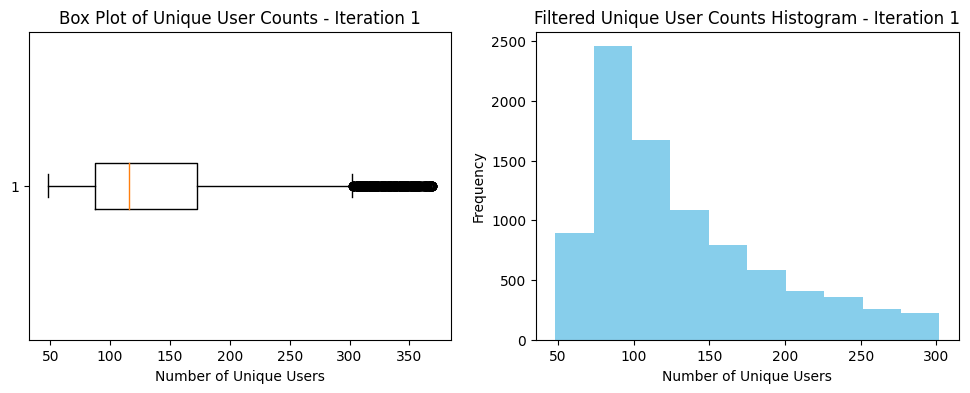


Filtered DataFrame - Iteration 2
                 song_id  unique_user_count
9140  SOXNZUH12AB018393F                276
2827  SOHCUMK12A8C14078A                276
4261  SOKTJMZ12AB018C9A0                276
4953  SOMMMFT12A67ADC119                276
519   SOBIWNU12A6BD56C1E                276
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8504 rows x 2 columns]


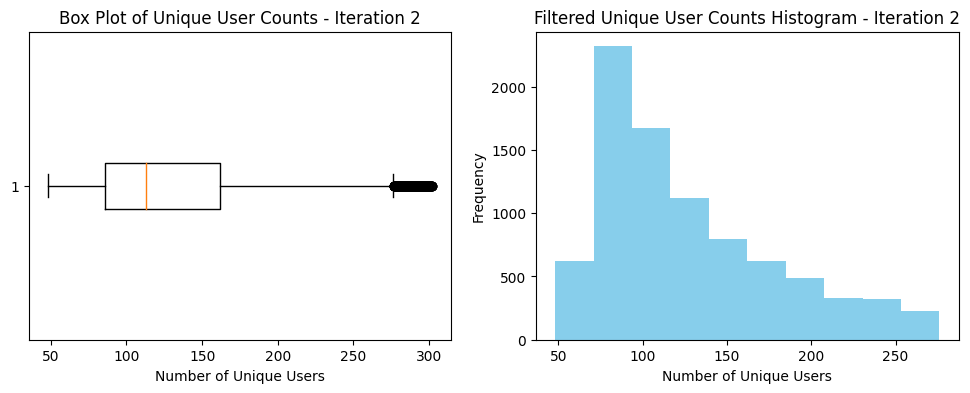


Filtered DataFrame - Iteration 3
                 song_id  unique_user_count
5787  SOOQFQE12AB0180901                263
5929  SOPACYC12AF729D0F7                263
8477  SOVVRDZ12A6701C577                263
2653  SOGRWNZ12A67ADEB27                263
6652  SOQUOPM12A6D4F841F                263
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8381 rows x 2 columns]


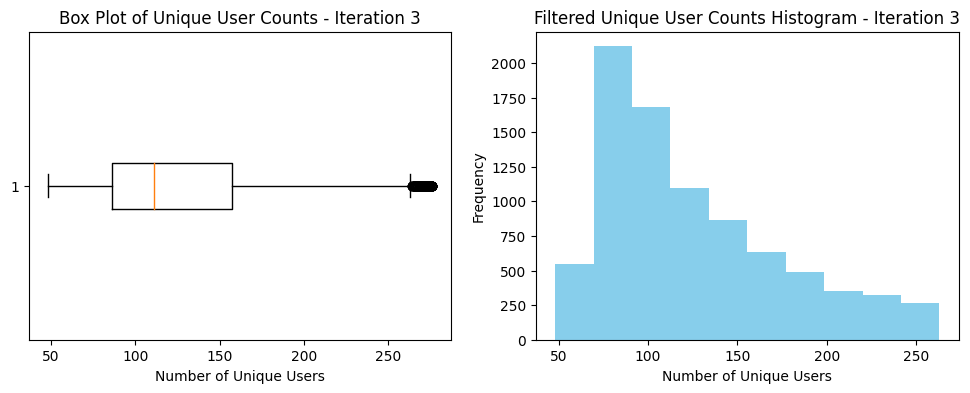


Filtered DataFrame - Iteration 4
                 song_id  unique_user_count
7329  SOSQJWM12A6D4F79E0                260
8537  SOVZHYS12A8C14663F                260
1315  SODJDHK12AB0181540                260
2343  SOFZSAT12AF72A0806                260
252   SOAPNSG12A8C13481A                260
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8356 rows x 2 columns]


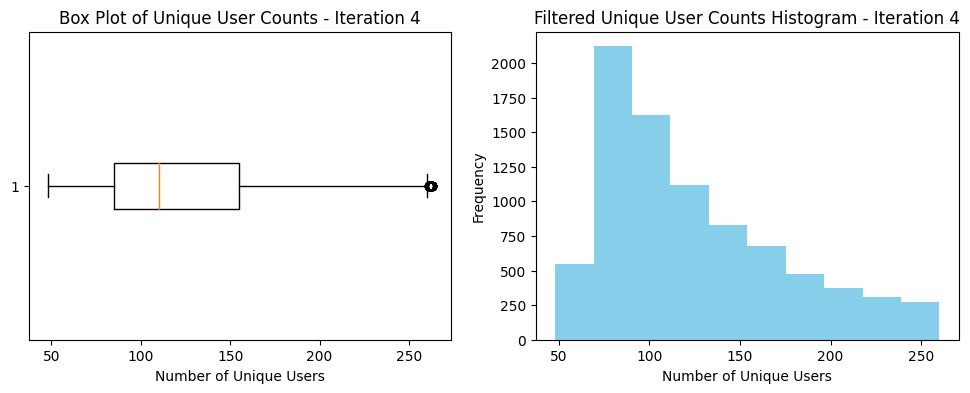


Filtered DataFrame - Iteration 5
                 song_id  unique_user_count
5196  SONDJCU12AB017B729                257
102   SOAGIAY12AB0183D8F                257
8180  SOUYPYF12A58A76897                257
3488  SOITSDN12A8C1359F8                257
8711  SOWKZLV12A6D4F77C1                257
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8317 rows x 2 columns]


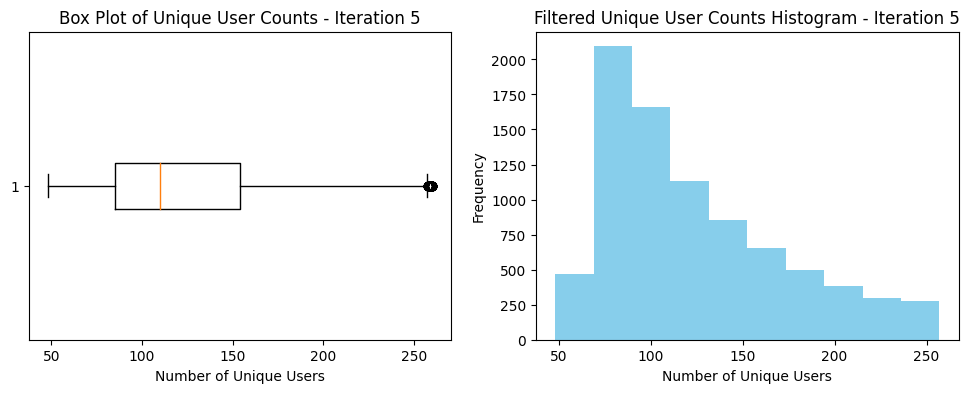


Filtered DataFrame - Iteration 6
                 song_id  unique_user_count
7505  SOTDDHI12A8C1411D9                255
7595  SOTIDKX12A6D4FA7EA                255
9464  SOYKKZP12A6D4F78D0                255
9200  SOXRSDX12A67ADA057                255
3688  SOJGRIS12AB018B889                255
...                  ...                ...
8747  SOWNLZF12A58A79811                 51
4492  SOLIGVL12AB017DBAE                 51
622   SOBPGWB12A6D4F7EF3                 50
9638  SOYYBJJ12AB017E9FD                 48
2666  SOGSPGJ12A8C134FAA                 48

[8295 rows x 2 columns]


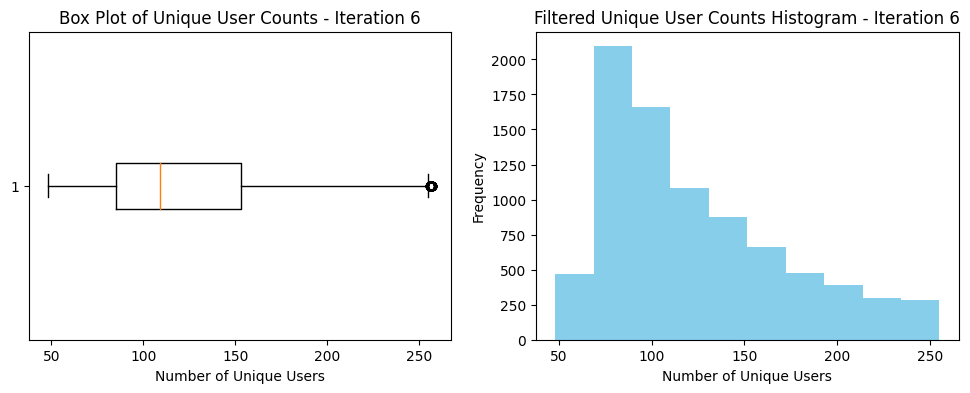

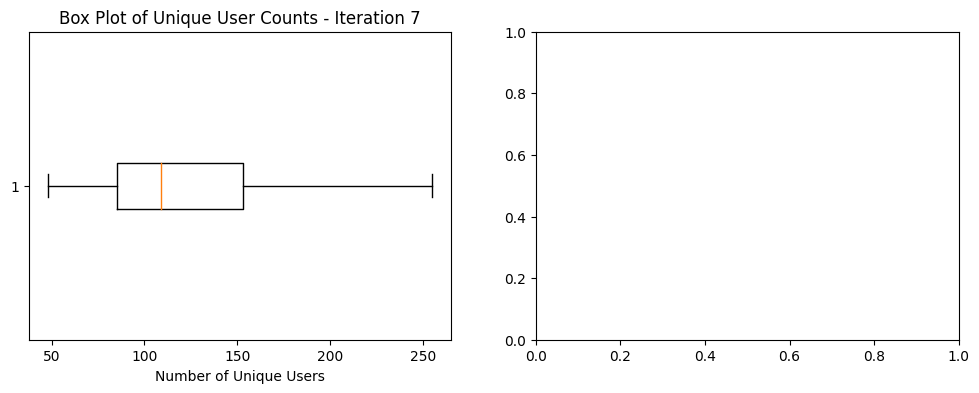

In [50]:
# Step 1: Calculate the number of unique users for each song
data = user_song_df
import pandas as pd
import matplotlib.pyplot as plt



# Step 1: Calculate the number of unique users per song
unique_users_per_song = data.groupby('song_id')['user_id'].nunique().reset_index()
unique_users_per_song.columns = ['song_id', 'unique_user_count']

# Step 2: Sort in descending order and show the top rows
unique_users_per_song = unique_users_per_song.sort_values(by='unique_user_count', ascending=False)
print("Head of the sorted dataframe:")
print(unique_users_per_song.head())

# Step 3: Plotting and iterative box plot filtering
iteration = 0
while True:
    # Create a figure for each iteration
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Show the box plot of the current unique user counts
    ax[0].boxplot(unique_users_per_song['unique_user_count'], vert=False)
    ax[0].set_title(f'Box Plot of Unique User Counts - Iteration {iteration}')
    ax[0].set_xlabel('Number of Unique Users')

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = unique_users_per_song['unique_user_count'].quantile(0.25)
    q3 = unique_users_per_song['unique_user_count'].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    iqr = q3 - q1

    # Determine the filtering bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to exclude extreme values
    filtered_df = unique_users_per_song[(unique_users_per_song['unique_user_count'] >= lower_bound) &
                                        (unique_users_per_song['unique_user_count'] <= upper_bound)]

    # If the filtered dataframe is the same as the original, stop the iteration
    if filtered_df.shape[0] == unique_users_per_song.shape[0]:
        break

    # Update the dataframe for the next iteration
    unique_users_per_song = filtered_df

    # Plot the histogram of the filtered unique user counts
    ax[1].hist(unique_users_per_song['unique_user_count'], bins=10, color='skyblue')
    ax[1].set_title(f'Filtered Unique User Counts Histogram - Iteration {iteration}')
    ax[1].set_xlabel('Number of Unique Users')
    ax[1].set_ylabel('Frequency')

    # Show the DataFrame and the plot for the current iteration
    print(f"\nFiltered DataFrame - Iteration {iteration}")
    print(unique_users_per_song)

    plt.show()

    # Move to the next iteration
    iteration += 1

## Based on the above EDA, songs played by 120 to 250 unique users could be considered to be Famous Songs (After excluding the outliers).

## EDA for Artist
```



In [55]:

# Group by 'user_id' and 'artist_name' and aggregate
user_artist_df = combined_df.groupby(['user_id', 'artist_name'])['play_count'].agg(['sum']).reset_index()

# Rename columns for clarity
user_artist_df.columns = ['user_id', 'artist_name', 'sum_playcount']

# Display the resulting DataFrame
print("Head")
user_artist_df.sort_values(by='sum_playcount', ascending=False).head(10)

# # Display the resulting DataFrame
# print("Tail")
# user_artist_df.sort_values(by='sum_playcount', ascending=False).tail(10)


Head


,user_id,artist_name,sum_playcount
1115945,d13609d62db6df876d3cc388225478618bb7b912,Gorillaz,2422
810484,972cce803aa7beceaa7d0039e4c7c0ff097e4d55,Fall Out Boy,1992
943050,b007808f6e718d8ad52652e56d2109cf91986138,Muse,1075
430368,50996bbabb6f7857bf0c8019435b5246a0e45cfd,Righteous Pigs,920
506027,5ea608df0357ec4fda191cb9316fe8e6e65e3777,Tegan And Sara,886
1004549,bb85bb79612e5373ac714fcd4469cabeb5ed94e1,Darren Styles,796
1172770,dc02d3c4fb534ca1406f720c70678e5858a5ca0a,The Black Keys,764
1027856,c012ec364329bb08cbe3e62fe76db31f8c5d8ec3,Dwight Yoakam,683
603032,70caceccaa745b6f7bc2898a154538eb1ada4d5a,The Lonely Island / T-Pain,676
1121384,d2232ac7a1ec17b283b5dff243161902b2cb706c,Taylor Swift,666


Head of the sorted dataframe:
                                          user_id     artist_name  \
1115945  d13609d62db6df876d3cc388225478618bb7b912        Gorillaz   
810484   972cce803aa7beceaa7d0039e4c7c0ff097e4d55    Fall Out Boy   
943050   b007808f6e718d8ad52652e56d2109cf91986138            Muse   
430368   50996bbabb6f7857bf0c8019435b5246a0e45cfd  Righteous Pigs   
506027   5ea608df0357ec4fda191cb9316fe8e6e65e3777  Tegan And Sara   

         total_playcount  
1115945             2422  
810484              1992  
943050              1075  
430368               920  
506027               886  

Filtered DataFrame - Iteration 0
                                          user_id                 artist_name  \
383579   482e0fed87a8041046f5ad68a99a946717d99808                Beastie Boys   
1304950  f4cb6c024a6a1b19641a2df8da16c628966cf7b1                       Phish   
1251203  eb1474cdf333f18f9218e0d8bfc04c9a6e29efde                      Enigma   
1195127  e06754d00d6556599e10fdad27

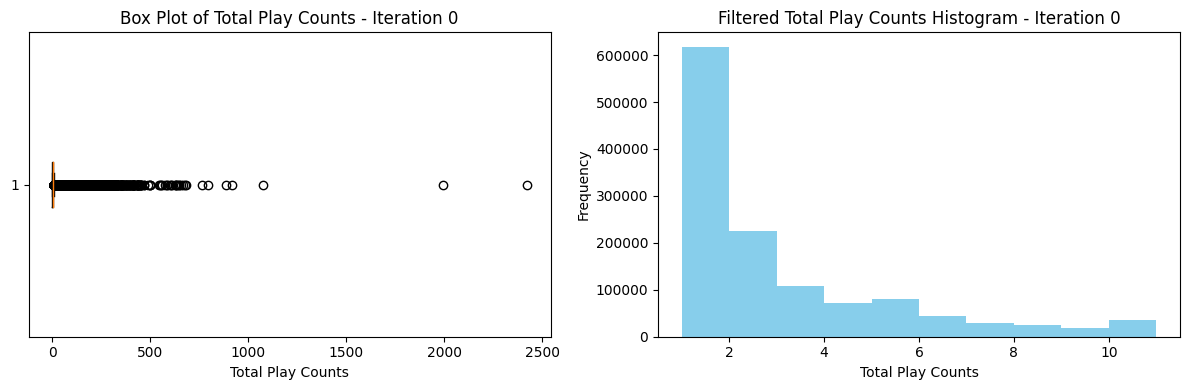


Filtered DataFrame - Iteration 1
                                          user_id      artist_name  \
963953   b3e477ea89cf1915a641e7b75606804d3833a558             Maná   
719890   8698a61587653638cec2d2dfe0aac40da56b17bf    Sidney Bechet   
388122   48ef470180f5606d406e8aac4d994f49643bf0ba    Lonnie Gordon   
1040549  c2d4f7e659c1f0a0ce14cfd2147ec188e2d53252             Muse   
821949   9941d4f092bb492c03b654a7cd439ff4e42f43c9  Alliance Ethnik   
...                                           ...              ...   
628272   75df7d05a06900b0f63ac598cf2bea48e2c54239            1990s   
628274   75df7d05a06900b0f63ac598cf2bea48e2c54239       Air Supply   
628276   75df7d05a06900b0f63ac598cf2bea48e2c54239          Bacilos   
628277   75df7d05a06900b0f63ac598cf2bea48e2c54239     Bette Midler   
683263   7f78d3379497706aa32b88d84a3378265a9f7779  Black Eyed Peas   

         total_playcount  
963953                 6  
719890                 6  
388122                 6  
1040549          

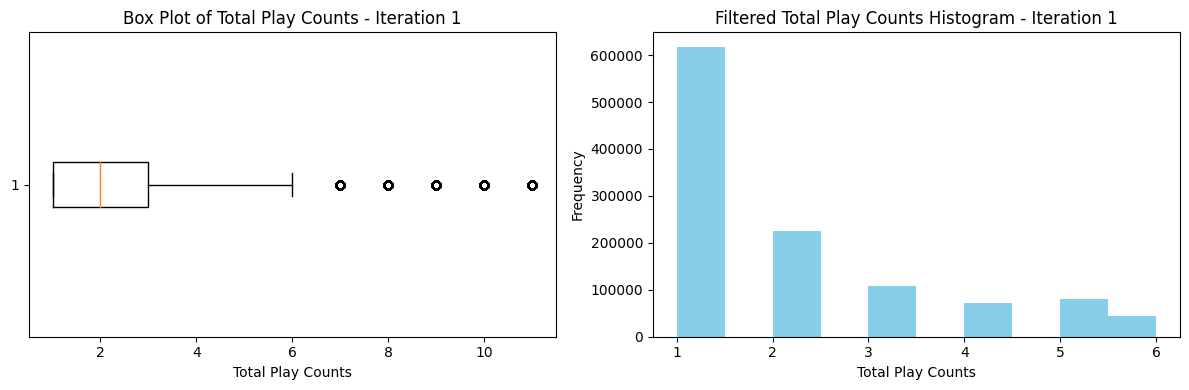


Filtered DataFrame - Iteration 2
                                          user_id      artist_name  \
963953   b3e477ea89cf1915a641e7b75606804d3833a558             Maná   
719890   8698a61587653638cec2d2dfe0aac40da56b17bf    Sidney Bechet   
388122   48ef470180f5606d406e8aac4d994f49643bf0ba    Lonnie Gordon   
1040549  c2d4f7e659c1f0a0ce14cfd2147ec188e2d53252             Muse   
821949   9941d4f092bb492c03b654a7cd439ff4e42f43c9  Alliance Ethnik   
...                                           ...              ...   
628272   75df7d05a06900b0f63ac598cf2bea48e2c54239            1990s   
628274   75df7d05a06900b0f63ac598cf2bea48e2c54239       Air Supply   
628276   75df7d05a06900b0f63ac598cf2bea48e2c54239          Bacilos   
628277   75df7d05a06900b0f63ac598cf2bea48e2c54239     Bette Midler   
683263   7f78d3379497706aa32b88d84a3378265a9f7779  Black Eyed Peas   

         total_playcount  
963953                 6  
719890                 6  
388122                 6  
1040549          

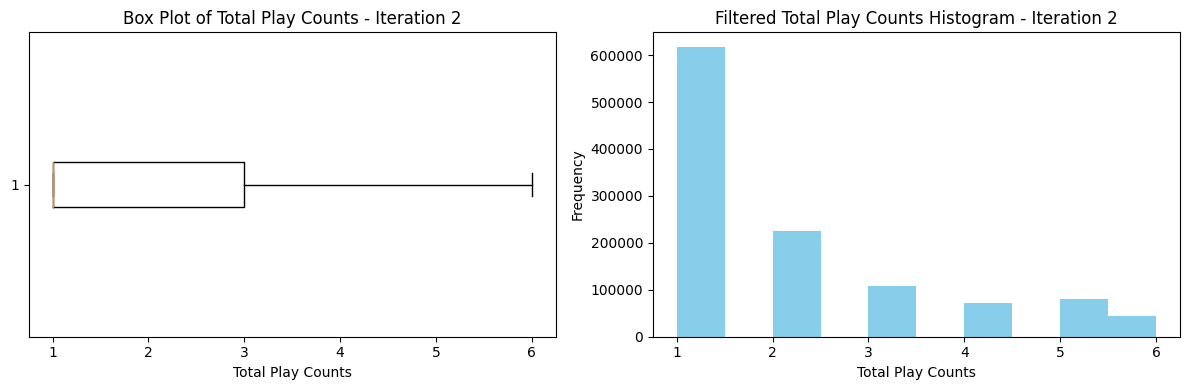

In [57]:
data = user_artist_df
import pandas as pd
import matplotlib.pyplot as plt
# Step 1: Calculate the number of times an artist's songs were played by each user
artist_play_count = data.groupby(['user_id', 'artist_name'])['sum_playcount'].sum().reset_index()
artist_play_count.columns = ['user_id', 'artist_name', 'total_playcount']

# Step 2: Sort in descending order and show the top rows
artist_play_count_sorted = artist_play_count.sort_values(by='total_playcount', ascending=False)
print("Head of the sorted dataframe:")
print(artist_play_count_sorted.head())

# Step 3: Iterative box plot filtering to remove outliers
iteration = 0
while True:
    # Create a figure for the current iteration
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Show the box plot of the current total play counts
    ax[0].boxplot(artist_play_count_sorted['total_playcount'], vert=False)
    ax[0].set_title(f'Box Plot of Total Play Counts - Iteration {iteration}')
    ax[0].set_xlabel('Total Play Counts')

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = artist_play_count_sorted['total_playcount'].quantile(0.25)
    q3 = artist_play_count_sorted['total_playcount'].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    iqr = q3 - q1

    # Determine the filtering bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter the DataFrame to exclude extreme values
    filtered_df = artist_play_count_sorted[(artist_play_count_sorted['total_playcount'] >= lower_bound) &
                                           (artist_play_count_sorted['total_playcount'] <= upper_bound)]

    # Plot the histogram of the filtered play counts
    ax[1].hist(filtered_df['total_playcount'], bins=10, color='skyblue')
    ax[1].set_title(f'Filtered Total Play Counts Histogram - Iteration {iteration}')
    ax[1].set_xlabel('Total Play Counts')
    ax[1].set_ylabel('Frequency')

    # Show the filtered DataFrame for the current iteration
    print(f"\nFiltered DataFrame - Iteration {iteration}")
    print(filtered_df)

    # Display the plots
    plt.tight_layout()
    plt.show()

    # If the filtered dataframe is the same as the original, stop the iteration
    if filtered_df.shape[0] == artist_play_count_sorted.shape[0]:
        break

    # Update the dataframe for the next iteration
    artist_play_count_sorted = filtered_df

    # Move to the next iteration
    iteration += 1

### Based on the above EDA usually a famous artist is played by a user between 3 (3 times IQR) to (6 times upper whisker line) exluding some extreeme outliers

## Summary of hypothesis based on the above EDAs performed

* An Artist is favorite of an user if the Artist is played more than 3 times by an user

* Each popular song were played by 100(Second Quartile/Median) to 200 (1.5 IQR range) unique users after excluding the outliers

* Each popular song were played  300 (Second Quarltile/Median) to 750 (1.5 IQR range) times



## Our recommendation system will recommends unplayed songs to the user based on the Artist Similarity,
1.  Identify most liked Artist by users,the ones who were played more than 3 times by the user. let's select TOP3 Artists
2.  Songs of that TOP3 artist played between 250 to 500 times are considered to be famous. Lets create list those famous songs by the TOP3 Artists selected in step1
3.  Find the Songs Not Played by the User within those popular songs in step2
4.  Recommend songs which are not played by the user, but played for 250 + times by other users in descending order of of Play count

In [14]:
combined_df.head()

,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,18887,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,21627,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,27714,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,34428,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


In [11]:
# Function to recommend songs based on the given algorithm

data = combined_df
def recommend_songs(user_id, data):

    # Step 1: Identify most liked artists (played more than 3 times by the user)

    user_data = data[data['user_id'] == user_id]
    artist_play_counts = user_data.groupby('artist_name')['play_count'].sum()
    most_liked_artists = artist_play_counts[artist_play_counts > 3].sort_values(ascending=False).head(3)

    # If no liked artists found, return early
    if most_liked_artists.empty:
        return f"No sufficient play data for user {user_id} to make recommendations."

    top3_artists = most_liked_artists.index.tolist()

    # Songs by top3 avorite artists
    songs_by_fav_artist = data[(data['artist_name'].isin(top3_artists))]


    # Songs by fav artist played >300 times are famous
    famsongs_by_fav_artist = songs_by_fav_artist[songs_by_fav_artist.groupby(['song_id','title','artist_name'])['play_count'].transform('sum') > 300]





    # famous songs are played by atleast 100 Unique users
    famsongs_by_fav_artist_recommends = famsongs_by_fav_artist[famsongs_by_fav_artist['song_id'].isin(famsongs_by_fav_artist.groupby('song_id')['play_count'].sum()[famsongs_by_fav_artist.groupby('song_id')['user_id'].nunique() > 100].index)]

    #  Step 3: Find songs not played by the user in the famous songs, Recommend only those songs which are not played by the user earlier
    famsongs_by_fav_artist_recommends_final = famsongs_by_fav_artist_recommends[~famsongs_by_fav_artist_recommends['song_id'].isin(user_data['song_id'].unique())]


    # Unique list of recommended songs
    recommendations = famsongs_by_fav_artist_recommends_final.groupby(['song_id','title','artist_name','year'])['user_id'].nunique().reset_index()
    recommendations.columns = ['song_id','title','artist_name','year','played_by_unique_users']
    recommendations = recommendations.sort_values(by='played_by_unique_users', ascending=False)
    print('recommendations')
    print(recommendations)


## Recommend favourite music for an artist
### Repace userid for a diffeerent user in the code block below

In [10]:

user_id = '3f73f44560e822344b0fb7c6b463869743eb9860'  # Replace with the desired user ID
recommendation_result = recommend_songs(user_id, data)

recommendations
              song_id                          title   artist_name  year  \
2  SOKUTUM12A6701D9CD                Do You Remember  Jack Johnson  2005   
6  SOXDQPZ12A8C13F4FC             Staple It Together  Jack Johnson  2005   
1  SOKLVUI12A6701BF1B                     If I Could  Jack Johnson  2005   
4  SOQLVIT12A8C137EA2       Sleep Through The Static  Jack Johnson  2008   
7  SOYZZMQ12AF729A13C                      Sweet Pea      Amos Lee  2006   
3  SOKYJOP12A6701FC21  The Horizon Has Been Defeated  Jack Johnson  2003   
0  SODIKIZ12A8C137EBC                      Same Girl  Jack Johnson  2008   
5  SOWGZFG12A8151AF41                        Monsoon  Jack Johnson  2008   

   played_by_unique_users  
2                    1322  
6                     431  
1                     356  
4                     220  
7                     164  
3                     149  
0                     141  
5                     113  
